2025-01-07 14:54:53.282068: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-07 14:54:53.282135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-07 14:54:53.345173: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-07 14:54:53.473043: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-07 14:54:54.859560: W tensorflow/compiler/tf2

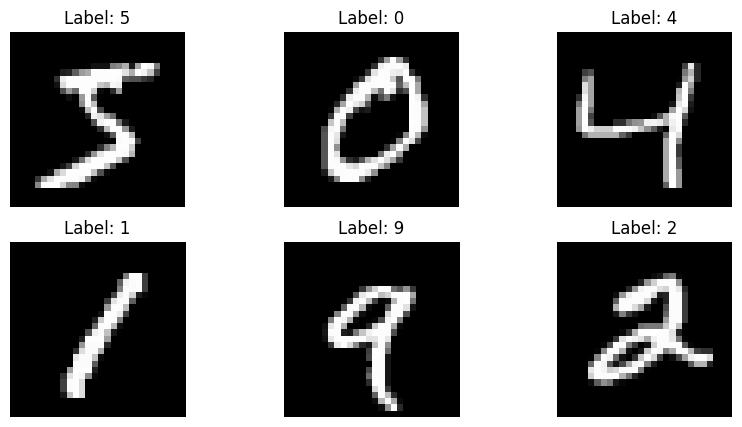

Shape of training data: (60000, 28, 28)
Shape of test data: (10000, 28, 28)


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Нормализация данных (приведение к диапазону [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Визуализация некоторых изображений
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

# Проверка формы данных
print(f"Shape of training data: {x_train.shape}")
print(f"Shape of test data: {x_test.shape}")

In [2]:
# Создание модели нейронной сети
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Преобразование 2D изображений в 1D вектор
    Dense(128, activation='relu'),  # Скрытый слой с 128 нейронами и функцией активации ReLU
    Dense(64, activation='relu'),   # Второй скрытый слой с 64 нейронами
    Dense(10, activation='softmax') # Выходной слой для 10 классов с softmax
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")




2025-01-07 14:55:03.349190: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-01-07 14:55:03.604546: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2646 - accuracy: 0.9229 - val_loss: 0.1354 - val_accuracy: 0.9590
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1104 - accuracy: 0.9659 - val_loss: 0.0993 - val_accuracy: 0.9702
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0770 - accuracy: 0.9766 - val_loss: 0.1083 - val_accuracy: 0.9657
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0576 - accuracy: 0.9818 - val_loss: 0.0872 - val_accuracy: 0.9743
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9741
Test accuracy: 0.97


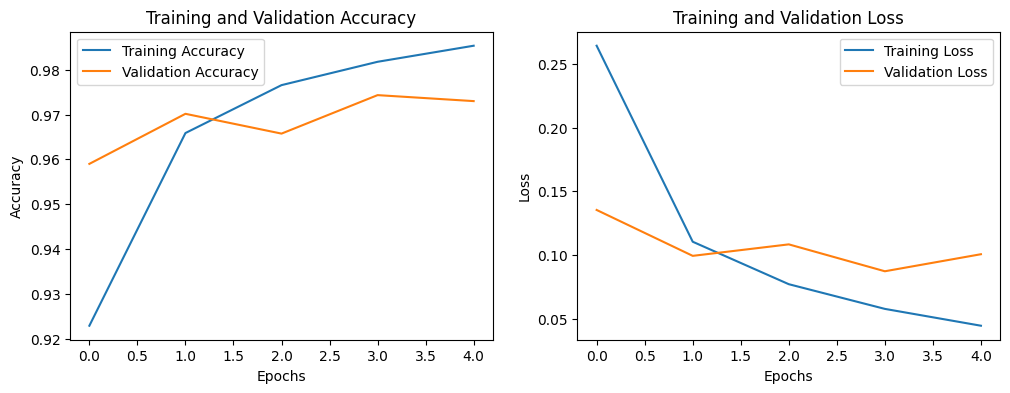

In [3]:
# Визуализация истории обучения
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [4]:
# Модель с использованием PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Подготовка данных для PyTorch
x_train_torch = torch.tensor(x_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
x_test_torch = torch.tensor(x_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train_torch, y_train_torch)
test_dataset = TensorDataset(x_test_torch, y_test_torch)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Создание модели PyTorch
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

model_torch = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

# Обучение модели PyTorch
for epoch in range(5):
    for batch in train_loader:
        inputs, targets = batch
        optimizer.zero_grad()
        outputs = model_torch(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Оценка модели PyTorch
correct = 0
total = 0
with torch.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        outputs = model_torch(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f'Test Accuracy (PyTorch): {100 * correct / total:.2f}%')


Test Accuracy (PyTorch): 96.81%


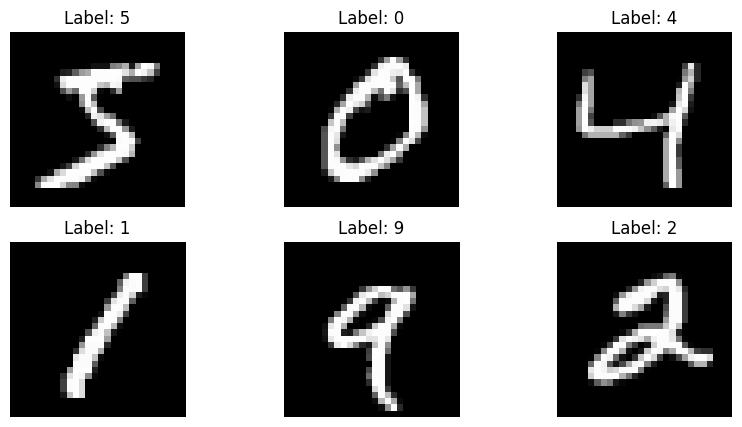

Shape of training data: (60000, 28, 28)
Shape of test data: (10000, 28, 28)
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2689 - accuracy: 0.9208 - val_loss: 0.1389 - val_accuracy: 0.9595
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1115 - accuracy: 0.9661 - val_loss: 0.1002 - val_accuracy: 0.9694
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0782 - accuracy: 0.9763 - val_loss: 0.1006 - val_accuracy: 0.9691
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0571 - accuracy: 0.9820 - val_loss: 0.0957 - val_accuracy: 0.9723
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9730
Test accuracy: 0.97


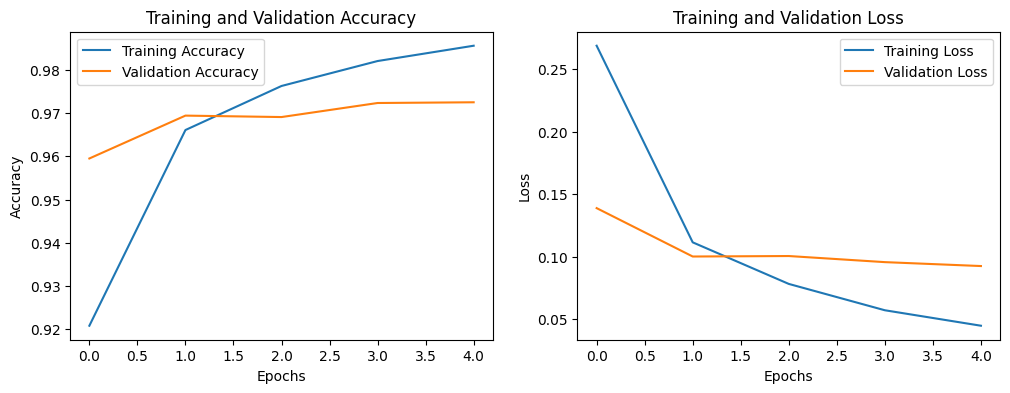

1/1 [==============================] - 0s 67ms/step


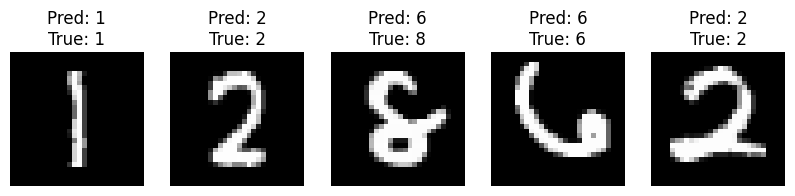

Test Accuracy (PyTorch): 96.10%


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Нормализация данных (приведение к диапазону [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Визуализация некоторых изображений
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

# Проверка формы данных
print(f"Shape of training data: {x_train.shape}")
print(f"Shape of test data: {x_test.shape}")

# Создание модели нейронной сети
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Преобразование 2D изображений в 1D вектор
    Dense(128, activation='relu'),  # Скрытый слой с 128 нейронами и функцией активации ReLU
    Dense(64, activation='relu'),   # Второй скрытый слой с 64 нейронами
    Dense(10, activation='softmax') # Выходной слой для 10 классов с softmax
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# Визуализация истории обучения
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Выбираем 5 случайных образцов из тестового набора
num_samples = 5
indices = np.random.choice(len(x_test), num_samples)

# Извлекаем изображения и их метки по выбранным индексам
selected_images = x_test[indices]
selected_labels = y_test[indices]

# Делаем предсказания на выбранных изображениях
predictions = model.predict(selected_images)


plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(selected_images[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    actual_label = selected_labels[i]
    plt.title(f'Pred: {predicted_label}\nTrue: {actual_label}')
    plt.axis('off')
plt.show()

# Модель с использованием PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Подготовка данных для PyTorch
x_train_torch = torch.tensor(x_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
x_test_torch = torch.tensor(x_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(x_train_torch, y_train_torch)
test_dataset = TensorDataset(x_test_torch, y_test_torch)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Создание модели PyTorch
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

model_torch = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

# Обучение модели PyTorch
for epoch in range(5):
    for batch in train_loader:
        inputs, targets = batch
        optimizer.zero_grad()
        outputs = model_torch(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Оценка модели PyTorch
correct = 0
total = 0
with torch.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        outputs = model_torch(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f'Test Accuracy (PyTorch): {100 * correct / total:.2f}%')

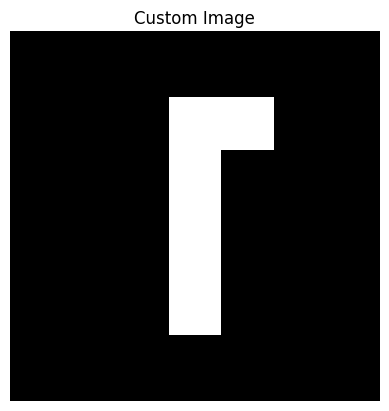

1/1 [==============================] - 0s 22ms/step
Predicted Label: 5


In [6]:
# Создаем изображение 28x28 с нулями (черный фон)
custom_image = np.zeros((28, 28))

# Рисуем цифру (простыми белыми линиями)
custom_image[5:23, 12:16] = 1  # Вертикальная линия
custom_image[5:9, 12:20] = 1   # Горизонтальная верхняя линия

# Визуализируем изображение
plt.imshow(custom_image, cmap='gray')
plt.title('Custom Image')
plt.axis('off')
plt.show()

# Добавляем батч-измерение и нормализуем
custom_image = custom_image.reshape(1, 28, 28) / 255.0

# Делаем предсказание
prediction = model.predict(custom_image)
predicted_label = np.argmax(prediction)

print(f'Predicted Label: {predicted_label}')

1/1 [==============================] - 0s 14ms/step


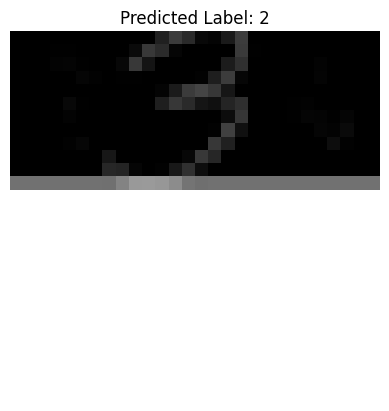

In [8]:
from PIL import Image

# Загружаем изображение
img = Image.open('Bitmap-Bild.png').convert('L')  # Конвертируем в grayscale
img = img.resize((28, 28))  # Масштабируем до 28x28 пикселей

# Преобразуем в массив и нормализуем
custom_image = np.array(img) / 255.0
custom_image = custom_image.reshape(1, 28, 28)

# Делаем предсказание
prediction = model.predict(custom_image)
predicted_label = np.argmax(prediction)

plt.imshow(custom_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()